In [4]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

from functions import *

## Recitfy Method

In [2]:
def rectify(base_func, err_func, train_X, test_X, train_y, test_y, h):
    """
    Parameters
    -----------
    base_func: model iteratively predicting 
            target in every horizon(fixed)
    err_function: model fit the error 
                  for give horizons(diff.)
    
    train: origin train data
    
    test: origin test data
     
    """
    """
    train_X = train.drop(['enregy'], aixs = 1).to_numpy()
    train_y = train.energy.to_numpy()
    test_X = test.drop(['enregy'], aixs = 1).to_numpy()
    test_y = test.energy.to_numpy()
    train = train.to_numpy()
    test = test.to_numpy()
    """
    sep_idx = train_X.shape[1]
    train_fX = train_X.to_numpy()
    train_X = train_X.iloc[:-sep_idx,:].to_numpy()
    train_y = train_y.iloc[:-sep_idx,:].to_numpy()
    test_X = test_X.to_numpy() 
    test_y = test_y.to_numpy() 
    #h = trian_y.shape[1]
    train_n = train_y.shape[0]
    test_n = test_y.shape[0]
    
    
    base_reg = base_func.fit(train_X, train_y)

    yhat = np.zeros(shape=(train_n, h))
    ypred = np.zeros(shape=(test_n, h))
    err = np.zeros(shape=(train_n, h))
    errpred = np.zeros(shape=(test_n, h))
    
    for i in range(h):
        yhat[:,i] = base_reg.predict(train_X).ravel()
        ypred[:,i] = base_reg.predict(test_X).ravel()
        
        # retify fit err for every time step prediction
        err = train_fX[sep_idx:,i].reshape(-1,1) - yhat[:,i].reshape(-1,1)
        err_reg = err_func.fit(train_X, err.ravel())
        errpred[:,i] = err_reg.predict(test_X).ravel()
        
        # one time step ahead shift train_X and test_X
        train_X = np.concatenate((train_X[:,1:], yhat[:,i].reshape(-1,1)),axis = 1)  
        test_X = np.concatenate((test_X[:,1:], ypred[:,i].reshape(-1,1)),axis = 1)
        
    
    
    
    ypred_e = ypred + errpred
    """
    print("---Training set without err callibration---")
    get_eval(, yhat)
    print("---Testing set with err callibration---")
    get_eval(test_y, ypred)
    """
   
    
    return yhat, ypred, ypred_e
    
    


In [188]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
et_reg = ExtraTreesRegressor()
knn1 = KNeighborsRegressor(n_jobs = 4)
knn2 = KNeighborsRegressor(n_jobs = 4)
ridge = Ridge()
yhat2, ypred2, ypred_e2 = rectify(knn1, knn2, ftrain, ftest, ttrain, ttest, 96)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [194]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
et_reg = ExtraTreesRegressor(n_jobs = 4)

ridge = Ridge()
yhat3, ypred3, ypred_e3 = rectify(ridge, et_reg, ftrain, ftest, ttrain, ttest, 96)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
et_reg = ExtraTreesRegressor()
knn = KNeighborsRegressor(n_jobs = 4)
ridge = Ridge()
yhat, ypred, ypred_e = rectify(ridge, knn, ftrain, ftest, ttrain, ttest, 96)

NameError: name 'ftrain' is not defined

In [12]:
# base: linear
# err: extra_trees
fig = plt.figure(figsize = (15,7))
plt.plot(ypred_e3[1300,:], 'g.')
plt.plot(ypred3[1300,:], 'b.')
plt.plot(ftest.iloc[1496,:96], 'r--')

NameError: name 'plt' is not defined

In [238]:
get_eval(ftest.iloc[96:,:96], ypred_e3[:-96,:])
get_eval(ftest.iloc[96:,:96], ypred3[:-96,:])

MSE: 9103.648801948877
MAE: 66.48228214942056
r2_score: 0.9427399039265447
MSE: 13699.833601656423
MAE: 81.1180648153075
r2_score: 0.913830838020326


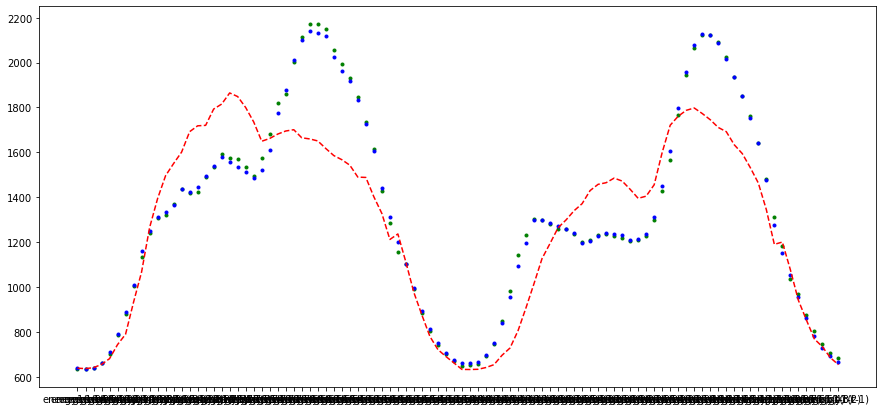

In [216]:
# base: knn
# err: knn
fig = plt.figure(figsize = (15,7))
plt.plot(ypred_e2[1400,:], 'g.')
plt.plot(ypred2[1400,:], 'b.')
plt.plot(ftest.iloc[1496,:96], 'r--')

In [239]:
get_eval(ftest.iloc[96:,:96], ypred_e2[:-96,:])
get_eval(ftest.iloc[96:,:96], ypred2[:-96,:])

MSE: 13534.13318579267
MAE: 81.75620341729264
r2_score: 0.9148730598742425
MSE: 13114.375422522819
MAE: 80.2450967429204
r2_score: 0.9175132506785346


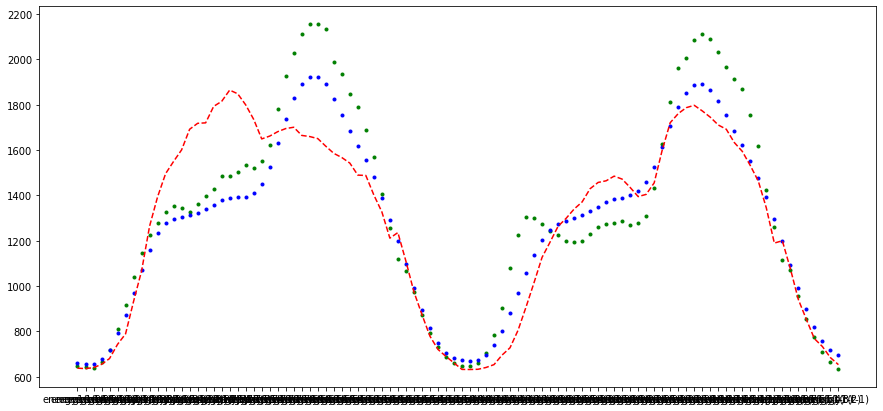

In [21]:
# base: linear
# err: knn
fig = plt.figure(figsize = (15,7))
plt.plot(ypred_e[1400,:], 'g.')
plt.plot(ypred[1400,:], 'b.')
plt.plot(ftest.iloc[1496,:96], 'r--')

In [22]:
get_eval(ftest.iloc[96:,:96], ypred_e[:-96,:])
get_eval(ftest.iloc[96:,:96], ypred[:-96,:])

MSE: 10746.159892695892
MAE: 70.85421785177992
r2_score: 0.9324088438314151
MSE: 13699.833601656423
MAE: 81.1180648153075
r2_score: 0.913830838020326


In [3]:
train = pd.read_csv("../data/train_nocat_hh.csv", index_col = 'tstp')
test = pd.read_csv("../data/test_nocat_hh.csv", index_col = 'tstp')

In [16]:
train = extract_dmhq(train)
test = extract_dmhq(test)

### Creat lag ahead scenarios

In [17]:
# rectify
cols = train.columns[8:8]
ftrain, ttrain = feature_target_construct(train, 96, 1, 0, 0, cols, 2,
                                          wd_on = False, d_on = False,
                                          m_on = False, h_on = False, q_on = False)

ftest, ttest = feature_target_construct(test, 96, 1, 0, 0, cols, 2, 
                                        wd_on = False, d_on = False,
                                        m_on = False, h_on = False, q_on = False)
ftrain.drop(['LCLid'], axis = 1,inplace = True)
ftest.drop(['LCLid'], axis = 1, inplace = True)

In [246]:
# normal multioutput
cols = train.columns[:8]
ftrain, ttrain = feature_target_construct(train, 192, 96, 0, 0, cols, 2,
                                          wd_on = True, d_on = True,
                                          m_on = True, h_on = True, q_on = True)

ftest, ttest = feature_target_construct(test, 192, 96, 0, 0, cols, 2, 
                                        wd_on = True, d_on = True,
                                        m_on = True, h_on = True, q_on = True)


In [247]:
feature_list = list(ftrain.columns)

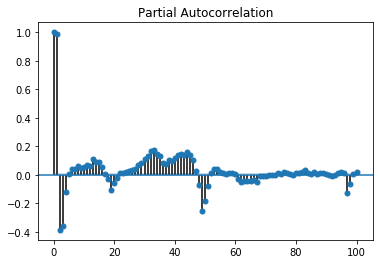

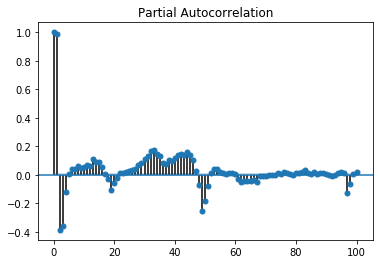

In [248]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(train.energy, lags = 100)

### Seeking outliers

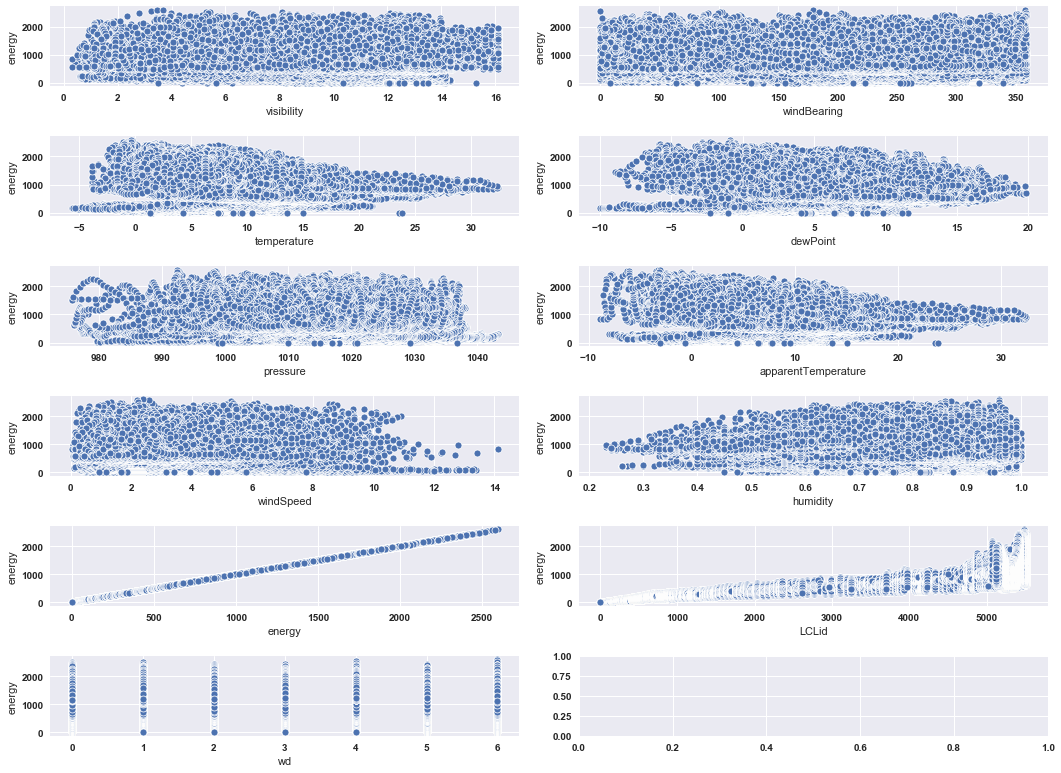

In [145]:
scatter_plot(train)

### Distribution

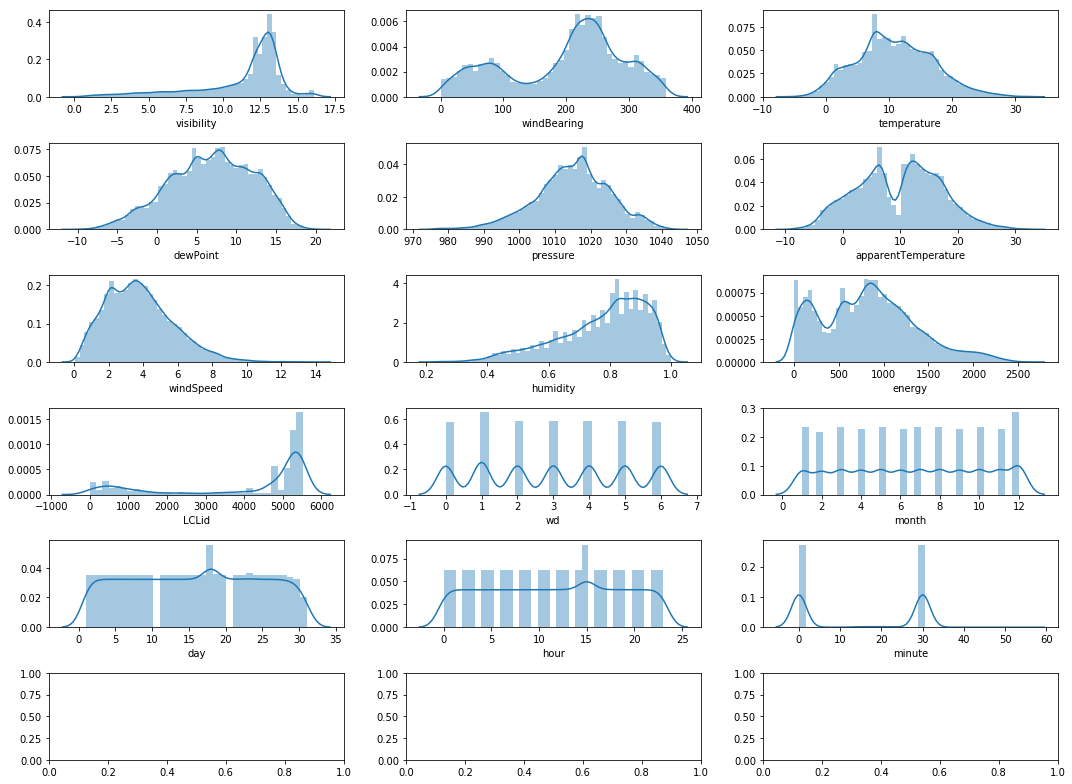

In [7]:
distri_plot(train)

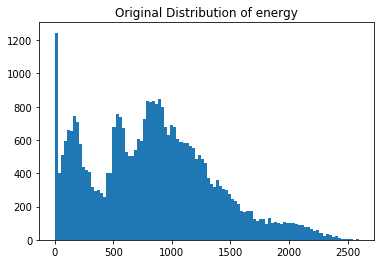

In [249]:
plt.hist(train['energy'], bins=100)
plt.title('Original Distribution of energy')
plt.show()

### Feature Selection: Tree-Based

In [250]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


%time reg = ExtraTreesRegressor(n_estimators = 30).fit(ftrain, ttrain)
#model = SelectFromModel(reg, prefit=True)
#cols = model.get_support(indices=True)
#mt_feature = model.transform(ftrain)

CPU times: user 1min 19s, sys: 1.2 s, total: 1min 21s
Wall time: 1min 21s


In [251]:
# Get numerical feature importances
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: LCLid                Importance: 0.319
Variable: hour                 Importance: 0.053
Variable: energy1(t-1)         Importance: 0.038
Variable: energy1(t-6)         Importance: 0.025
Variable: energy1(t-44)        Importance: 0.023
Variable: energy1(t-13)        Importance: 0.021
Variable: energy1(t-2)         Importance: 0.021
Variable: energy1(t-37)        Importance: 0.02
Variable: energy1(t-27)        Importance: 0.02
Variable: energy1(t-41)        Importance: 0.019
Variable: energy1(t-9)         Importance: 0.019
Variable: energy1(t-73)        Importance: 0.018
Variable: energy1(t-85)        Importance: 0.017
Variable: energy1(t-17)        Importance: 0.013
Variable: energy1(t-22)        Importance: 0.011
Variable: energy1(t-23)        Importance: 0.009
Variable: energy1(t-33)        Importance: 0.008
Variable: energy1(t-8)         Importance: 0.008
Variable: energy1(t-28)        Importance: 0.007
Variable: energy1(t-7)         Importance: 0.007
Variable: minute      

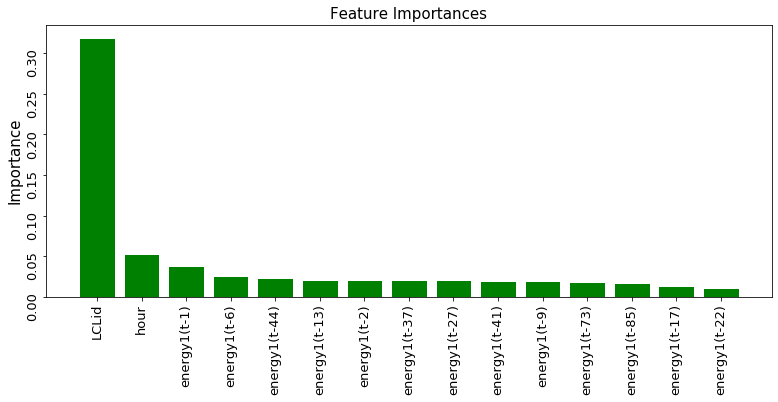

In [253]:
# important features
score = [i[1] for i in feature_importances if i[1] >= 0.01]
picked_features = [i[0] for i in feature_importances if i[1] >= 0.01]
# list of x locations for plotting
x_values = list(range(len(score)))
# Make a bar chart
fig = plt.figure(figsize=(13,5))
font = {'size'   : 15}
plt.rc('font', **font)
plt.bar(x_values, score, orientation = 'vertical', color = 'g', edgecolor = 'w', linewidth = 1)
# Tick labels for x axis
plt.xticks(x_values, picked_features, rotation=90, fontsize = 13)
plt.yticks(rotation='vertical', fontsize = 13)
# Axis labels and title
plt.ylabel('Importance',**font); 
plt.title('Feature Importances',**font);


In [256]:
pftrain = ftrain[picked_features]
pftest = ftest[picked_features]
#pftrain = ftrain
#pftest = ftest

### Scaling 

In [255]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler() ## will be used later in test set
mmscaler.fit(ftrain)
pftrain = mmscaler.transform(ftrain)
pftest = mmscaler.transform(ftest)

### Standardization

In [132]:
rng = np.random.RandomState(304)
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',random_state=rng)
qt.fit(ttrain)
pttrain = qt.transform(ttrain)
pttest = qt.transform(ttest)

### Feature Selection: PCA

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', 
          copy=True,
          whiten=False,
          svd_solver='auto',
          tol=0.0,
          iterated_power='auto',
          random_state=None)
pca.fit(pftrain)
pftrain = pca.transform(pftrain)
pftest = pca.transform(pftest)

In [53]:
pftrain.shape, pftest.shape

((35605, 13), (4418, 13))

### KNN Regression


In [258]:
from sklearn.metrics import make_scorer
def quantile_loss(y_true, y_pred, q):
    e = y_true - y_pred
    return np.mean(np.maximum(e*q, e*(q-1)))

qloss_05 = make_scorer(quantile_loss, 
                       greater_is_better=False, 
                       needs_proba=False,
                       needs_threshold=False, q = 0.05)

qloss_95 = make_scorer(quantile_loss, 
                       greater_is_better=False, 
                       needs_proba=False,
                       needs_threshold=False, q = 0.95)

In [272]:
from sklearn.neighbors import KNeighborsRegressor
knnr95 = KNeighborsRegressor(n_neighbors=3,
                           weights='distance', 
                           algorithm='auto', 
                           leaf_size=10, 
                           metric=quantile_loss, 
                           metric_params={'q':0.975}, 
                           n_jobs=4)
%time knnr95.fit(pftrain ,ttrain)
%time ypred95 = knnr95.predict(pftest.to_numpy()[1,:].reshape(1, -1))

CPU times: user 4.17 s, sys: 8.43 ms, total: 4.17 s
Wall time: 4.18 s
CPU times: user 61.5 ms, sys: 1.3 ms, total: 62.8 ms
Wall time: 105 ms


In [273]:
knnr05 = KNeighborsRegressor(n_neighbors=3,
                           weights='distance', 
                           algorithm='auto', 
                           leaf_size=10, 
                           metric=quantile_loss, 
                           metric_params={'q':0.025}, 
                           n_jobs=4)
knnr05.fit(pftrain ,ttrain)
ypred05 = knnr05.predict(pftest.to_numpy()[1,:].reshape(1, -1))

In [274]:
knnr = KNeighborsRegressor(n_neighbors=3,
                           weights='distance', 
                           algorithm='auto', 
                           leaf_size=10, 
                           metric=quantile_loss, 
                           metric_params={'q':0.5}, 
                           n_jobs=4)
knnr.fit(pftrain ,ttrain)
ypred = knnr.predict(pftest.to_numpy()[1,:].reshape(1, -1))

In [262]:
ypred.shape, ttest.to_numpy()[0,:].reshape(1, -1).shape


((1, 96), (1, 96))

In [263]:
r2_score(ttest.to_numpy()[0,:].reshape(-1, 1), ypred05.reshape(-1, 1))

0.3426769490909972

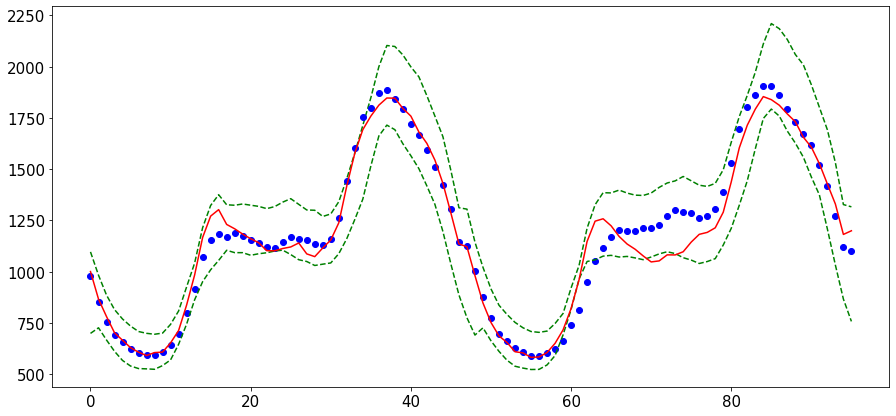

In [276]:
fig = plt.figure(figsize = (15,7))
plt.plot(ypred95[0,:],'g--')
plt.plot(ypred[0,:],'bo')
plt.plot(ypred05[0,:],'g--')
plt.plot(ttest.to_numpy()[1,:], 'r-')


In [277]:
from sklearn.utils import resample
n_bootstraps = 100
b_x = []
b_y = []
for _ in range(n_bootstraps):
    sample_X ,sample_y = resample(pftrain, ttrain)
    b_x.append(sample_X)
    b_y.append(sample_y)

In [ ]:
prediction = []

for i, feature in enumerate(b_x):
    knnr.fit(feature, b_y[i])
    prediction.append(knnr.predict(pftest))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



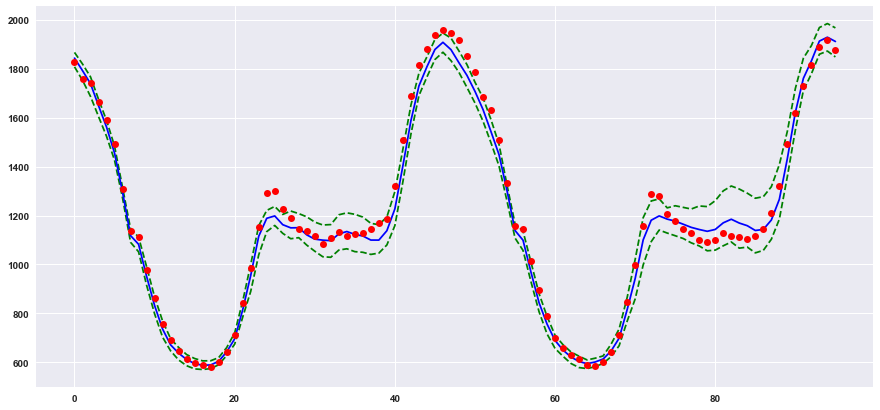

In [93]:
fig = plt.figure(figsize = (15,7))
plt.plot(np.quantile(prediction, 0.9, axis = 0)[1000,:],'g--')
plt.plot(np.quantile(prediction, 0.1, axis = 0)[1000,:],'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1000,:],'b-')
plt.plot(ttest.to_numpy()[1000,:],'ro')

In [79]:
ypred_t = knnr.predict(pftest)
get_eval(ttest, ypred_t)

MSE: 11627.009546467954
MAE: 72.99158383608169
r2_score: 0.926866924624593


### Xgboost

In [104]:
import numpy as np
np.random.seed(1)
import scipy

#ML
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

#utils
from functools import partial
#@title XGBQuantile Class
class XGBQuantile(XGBRegressor):
  def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, subsample=1):
    self.quant_alpha = quant_alpha
    self.quant_delta = quant_delta
    self.quant_thres = quant_thres
    self.quant_var = quant_var
    
    super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
       colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
       max_depth=max_depth, min_child_weight=min_child_weight, missing=missing, n_estimators=n_estimators,
       n_jobs= n_jobs, nthread=nthread, objective=objective, random_state=random_state,
       reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, seed=seed,
       silent=silent, subsample=subsample)
    
    self.test = None
  
  def fit(self, X, y):
    super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
    super().fit(X,y)
    return self
  
  def predict(self,X):
    return super().predict(X)
  
  def score(self, X, y):
    y_pred = super().predict(X)
    score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
    score = 1./score
    return score
      
  @staticmethod
  def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
 
    grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
    hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
    return grad, hess
  
  @staticmethod
  def original_quantile_loss(y_true,y_pred,alpha,delta):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
    return grad,hess

  
  @staticmethod
  def quantile_score(y_true, y_pred, alpha):
    score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
    score = np.sum(score)
    return score
  
  @staticmethod
  def quantile_cost(x, alpha):
    return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
  @staticmethod
  def get_split_gain(gradient,hessian,l=1):
    split_gain = list()
    for i in range(gradient.shape[0]):
      split_gain.append(np.sum(gradient[:i])/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])/(np.sum(hessian[i:])+l)-np.sum(gradient)/(np.sum(hessian)+l) )
    
    return np.array(split_gain)

    
 

In [122]:
from sklearn.multioutput import MultiOutputRegressor

X = pftrain
y = ttrain
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

xgbr95 = XGBQuantile(quant_alpha=0.95,
                     max_depth=3,
                     reg_alpha=5,
                     reg_lambda=1,
                     gamma=0.5,
                     n_jobs=4)
ypred_95 = xgbr95.fit(train_X, train_y.iloc[:,0]).predict(pftest)
#mr95 = MultiOutputRegressor(xgbr95, n_jobs = 4)
#%time mr95.fit(train_X, train_y)
#rc = MultiOutputRegressor(xgbr, cv = 5, random_state = 123)
#rc.fit(train_X, train_y)

In [125]:
ypred_95 = xgbr95.predict(pftest)

In [126]:
ypred_95

array([0.53346884, 0.4937935 , 0.49318045, ..., 0.49177933, 0.4943057 ,
       0.4922194 ], dtype=float32)

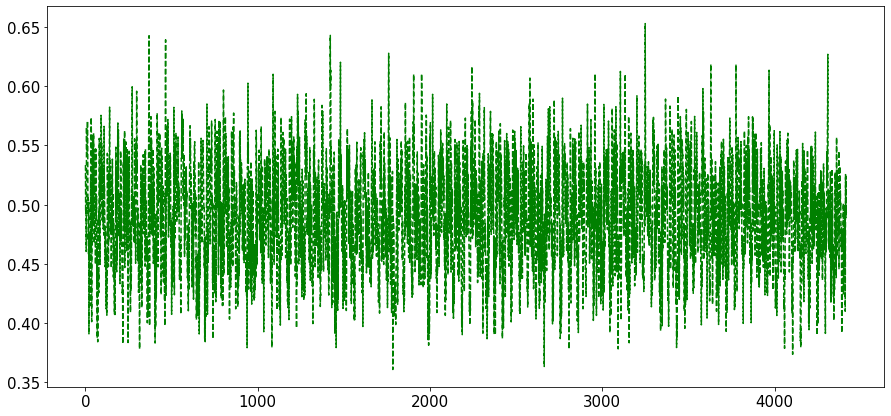

In [136]:
fig = plt.figure(figsize = (15,7))
plt.plot(ypred_95,'g--')
#plt.plot(ypred_05[1400,:],'g--')
#plt.plot(ypred[1400,:],'b-')
#plt.plot(ttest.to_numpy()[:,0],'r--')

### Gradient boost

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
gbr95 = GradientBoostingRegressor(loss = 'quantile', 
                                alpha=0.95)
gbr05 = GradientBoostingRegressor(loss = 'quantile', 
                                alpha=0.05)
gbr = GradientBoostingRegressor(loss = 'quantile', 
                                alpha=0.5)
mgbr95 = MultiOutputRegressor(gbr95, n_jobs=4)
mgbr05 = MultiOutputRegressor(gbr05, n_jobs=4)
mgbr = MultiOutputRegressor(gbr, n_jobs=4)
%time mgbr95.fit(pftrain, ttrain)
%time mgbr05.fit(pftrain, ttrain)
%time mgbr.fit(pftrain, ttrain)

CPU times: user 1.07 s, sys: 220 ms, total: 1.29 s
Wall time: 7min 17s
CPU times: user 806 ms, sys: 137 ms, total: 943 ms
Wall time: 7min 31s
CPU times: user 788 ms, sys: 139 ms, total: 927 ms
Wall time: 7min 34s


MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.5,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='quantile',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
              

In [126]:
ypred_g95 = mgbr95.predict(pftest)
ypred_g05 = mgbr05.predict(pftest)
ypred_g = mgbr.predict(pftest)


In [130]:
get_eval(ttest, ypred_g)

MSE: 23393.378759308383
MAE: 106.03498534145554
r2_score: 0.8528572867122433


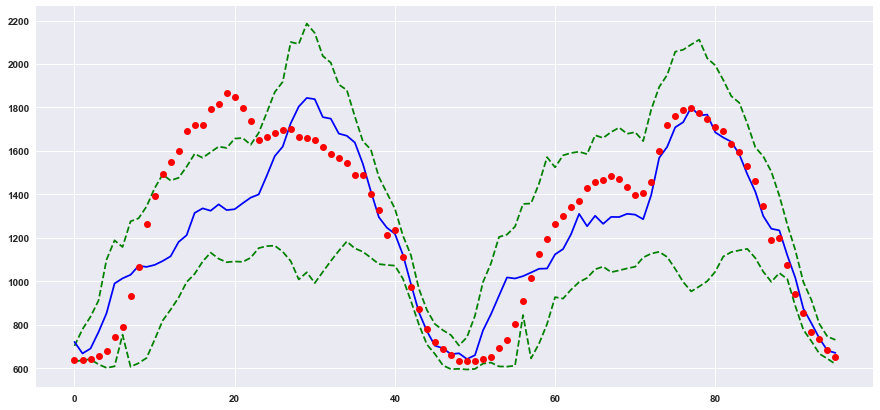

In [133]:
fig = plt.figure(figsize = (15,7))
plt.plot(ypred_g95[1400,:],'g--')
plt.plot(ypred_g05[1400,:],'g--')
plt.plot(ypred_g[1400,:],'b-')
plt.plot(ttest.to_numpy()[1400,:],'ro')

### Histgradient boost

In [98]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
hgbr = HistGradientBoostingRegressor()
mhgbr = MultiOutputRegressor(hgbr, n_jobs=4)
mhgbr.fit(pftrain, ttrain)


MultiOutputRegressor(estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                             learning_rate=0.1,
                                                             loss='least_squares',
                                                             max_bins=255,
                                                             max_depth=None,
                                                             max_iter=100,
                                                             max_leaf_nodes=31,
                                                             min_samples_leaf=20,
                                                             n_iter_no_change=None,
                                                             random_state=None,
                                                             scoring=None,
                                                             tol=1e-07,
                                                     

In [100]:
ypred_h = mhgbr.predict(pftest)

In [101]:
get_eval(ttest, ypred_h)

MSE: 12014.555927018331
MAE: 78.30813754032813
r2_score: 0.9244292850452167


In [106]:
mhgbr_1 = mhgbr.estimators_[0]
mhgbr_1.fit(pftrain, ttrain.iloc[:,0])

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [102]:
r2_list = []
for i in range(ttest.shape[0]):
    o_y = np.transpose(ttest.iloc[i,:].to_numpy())
    p_y = np.transpose(ypred_h[i,:])
    r2 = r2_score(o_y, p_y)
    r2_list.append(r2)

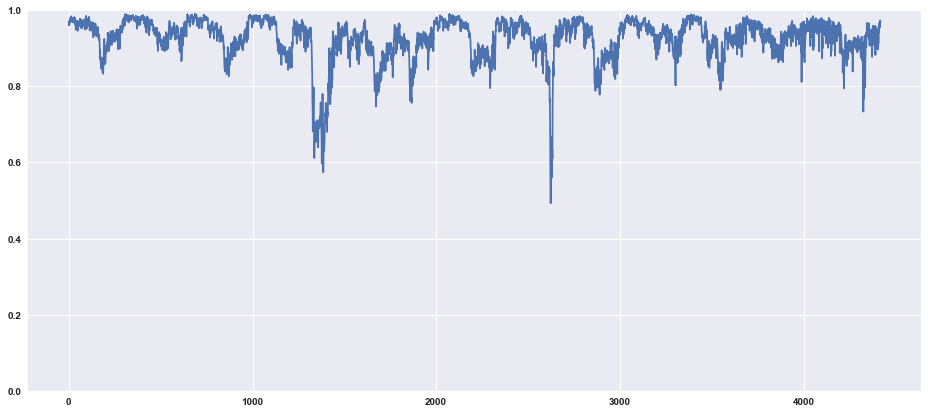

In [103]:
fig = plt.figure(figsize=(16,7))
plt.ylim(0)
plt.plot(r2_list)

### Extra Trees Regression

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=100, 
                          criterion= 'mse', 
                          max_depth=None, 
                          min_samples_split=5, 
                          min_samples_leaf=4, 
                          min_weight_fraction_leaf=0.0, 
                          max_features='auto', 
                          max_leaf_nodes=None, 
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None, 
                          bootstrap=False, 
                          oob_score=False, 
                          n_jobs=4, 
                          random_state=None, 
                          verbose=0, 
                          warm_start=True, 
                          ccp_alpha=0.3, max_samples=None)
X = pftrain
y = ttrain
#train_X, left_X, train_y, left_y = train_test_split(X, y, train_size = 0.9, shuffle= False)
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.7, shuffle= True)
%time etr.fit(train_X, train_y)

CPU times: user 2min 36s, sys: 6.18 s, total: 2min 42s
Wall time: 41.8 s


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.3, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=4, oob_score=False,
                    random_state=None, verbose=0, warm_start=True)

### Validation set

In [14]:
ypred = etr.predict(val_X)
o_y = np.transpose(val_y)
p_y = np.transpose(ypred)
get_eval(o_y, p_y)

MSE: 12210.065919753606
MAE: 51.72593906535276
r2_score: 0.8611502469093799


### Testing set

In [15]:
ypred_t = etr.predict(pftest)
o_y = np.transpose(ttest.to_numpy())
p_y = np.transpose(ypred_t)
get_eval(o_y, p_y)

MSE: 9364.614898250033
MAE: 68.83193750089914
r2_score: 0.9401822877365621


In [16]:
r2_list = []
for i in range(ttest.shape[0]):
    o_y = np.transpose(ttest.iloc[i,:].to_numpy())
    p_y = np.transpose(ypred_t[i,:])
    r2 = r2_score(o_y, p_y)
    r2_list.append(r2)

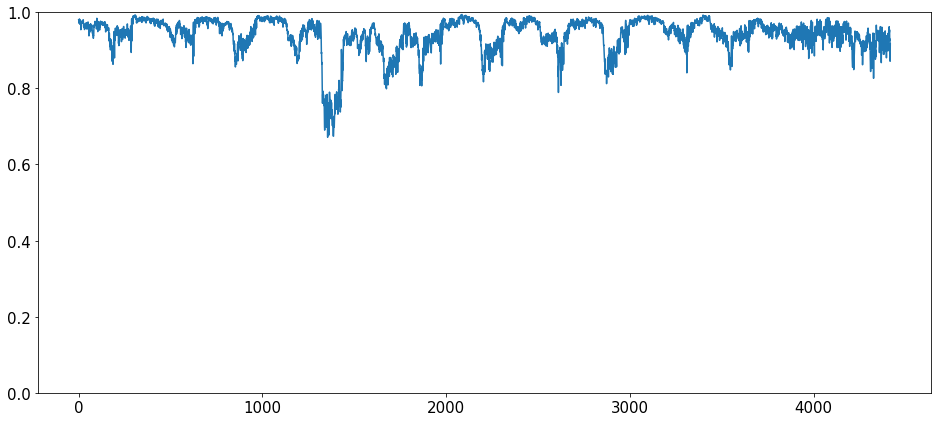

In [17]:
fig = plt.figure(figsize=(16,7))
plt.ylim(0)
plt.plot(r2_list)

### Confidence Interval: Bootstrapping

In [25]:
from sklearn.utils import resample
n_bootstraps = 100
b_x = []
b_y = []
for _ in range(n_bootstraps):
    sample_X ,sample_y = resample(pftrain, ttrain)
    b_x.append(sample_X)
    b_y.append(sample_y)

In [28]:
prediction = []

for i, feature in enumerate(b_x):
    etr = ExtraTreesRegressor(n_estimators=100, 
                          criterion= 'mse', 
                          max_depth=None, 
                          min_samples_split=5, 
                          min_samples_leaf=4, 
                          min_weight_fraction_leaf=0.0, 
                          max_features='auto', 
                          max_leaf_nodes=None, 
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None, 
                          bootstrap=False, 
                          oob_score=False, 
                          n_jobs=4, 
                          random_state=None, 
                          verbose=0, 
                          warm_start=True, 
                          ccp_alpha=0.3, max_samples=None)
    etr.fit(feature, b_y[i])
    prediction.append(etr.predict(pftest.iloc[:10,:]))

**bootstrap prediction:qunatile**

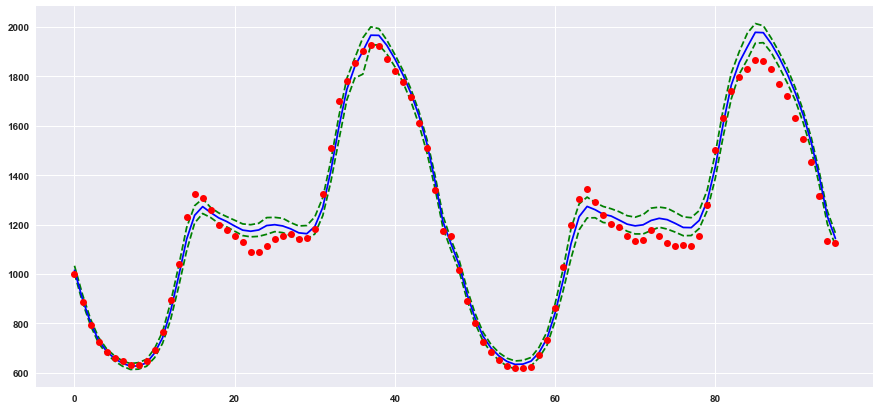

In [37]:
fig = plt.figure(figsize = (15,7))
plt.plot(np.quantile(prediction, 0.95, axis = 0)[1,:],'g--')
plt.plot(np.quantile(prediction, 0.05, axis = 0)[1,:],'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:],'b-')
plt.plot(ttest.to_numpy()[1,:],'ro')

**bootstrap precition: std**

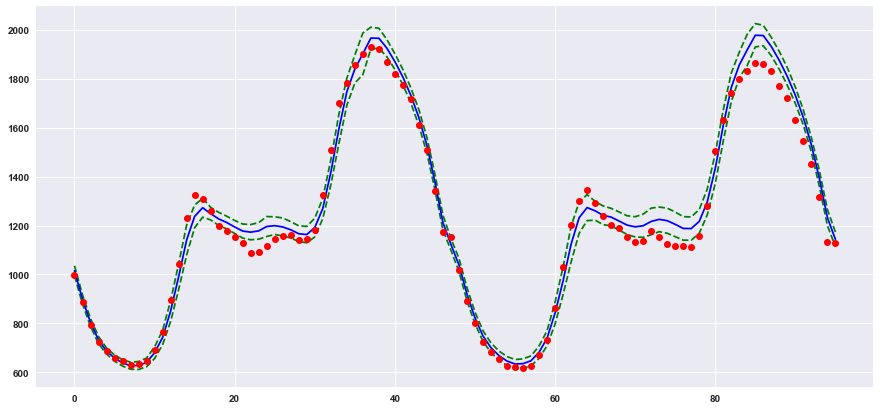

In [47]:
np.std(prediction, axis = 0)[1,:]
fig = plt.figure(figsize = (15,7))
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:] + 1.96*np.std(prediction, axis = 0)[1,:]
,'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:] -  1.96*np.std(prediction, axis = 0)[1,:],'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:] ,'b-')
plt.plot(ttest.to_numpy()[1,:],'ro')

### Confidence Interval: bootstrapping error extraction

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
train_X, val_X, train_y, val_y = train_test_split(pftrain, ttrain, train_size = 0.8, shuffle = True)
n_bootstraps = 100
b_x = []
b_y = []
for _ in range(n_bootstraps):
    sample_X ,sample_y = resample(train_X, train_y)
    b_x.append(sample_X)
    b_y.append(sample_y)

In [55]:
err = []

for i, feature in enumerate(b_x):
    etr = ExtraTreesRegressor(n_estimators=100, 
                          criterion= 'mse', 
                          max_depth=None, 
                          min_samples_split=5, 
                          min_samples_leaf=4, 
                          min_weight_fraction_leaf=0.0, 
                          max_features='auto', 
                          max_leaf_nodes=None, 
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None, 
                          bootstrap=False, 
                          oob_score=False, 
                          n_jobs=4, 
                          random_state=None, 
                          verbose=0, 
                          warm_start=True, 
                          ccp_alpha=0.3, max_samples=None)
    etr.fit(feature, b_y[i])
    err.append(etr.predict(val_X) - val_y.to_numpy())
%time    

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [65]:
np.quantile(err, 0.05, axis = 0)[1,:]

array([ 2.19260911e+00,  1.61854008e+01,  1.58970424e+01,  1.45384588e+01,
        1.40344453e+01,  1.51707869e+01,  1.16565956e+01,  1.97901438e+01,
        1.67583910e+01,  6.70035748e+00, -9.11100565e-01, -3.67953640e+01,
       -4.73451151e+01, -2.83178837e+00,  2.66871874e-01,  6.00292911e+00,
        3.71177395e+00,  1.13761459e-02,  1.51501946e+01,  1.39909740e+01,
        3.26790984e+01,  3.40274891e+01,  2.19723961e+01,  1.64927035e+01,
        2.30542209e+01,  1.78987311e+01,  1.14456501e+01,  3.12181655e+01,
        3.12230308e+01,  2.50123810e+01,  5.35384508e+00,  2.88040865e+01,
        3.13800228e+01,  1.60087777e+01,  1.04184816e+01,  1.74698664e+01,
        9.77180106e+00,  1.96759254e+01, -6.51711076e+00, -2.02845612e+01,
       -3.17859551e+01, -5.63252472e+01, -5.09664954e+01, -2.98604557e+01,
       -9.43792785e+00,  4.06746277e+00,  1.84235038e+01, -1.80118170e+01,
       -3.95661628e+00,  5.59868430e+00,  6.53025817e+00, -6.33220850e-01,
       -8.97356629e-01, -

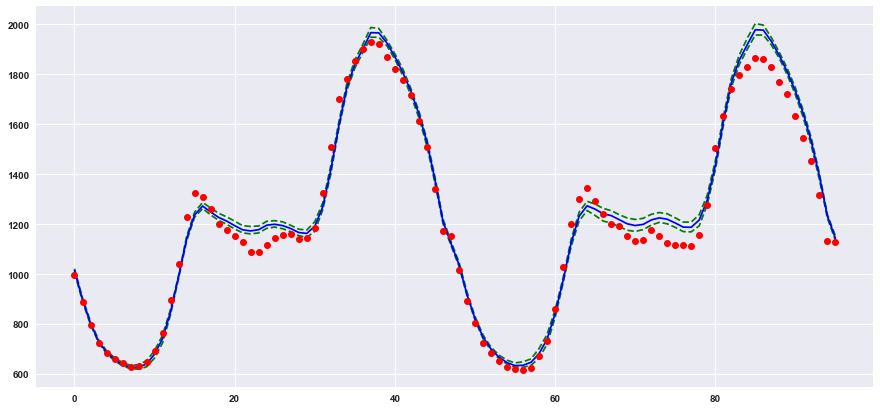

In [66]:
fig = plt.figure(figsize = (15,7))
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:] + np.quantile(err, 0.95, axis = 0)[1,:] - np.quantile(err, 0.5, axis = 0)[1,:],'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:] - np.quantile(err, 0.5, axis = 0)[1,:] + np.quantile(err, 0.05, axis = 0)[1,:],'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[1,:],'b-')
plt.plot(ttest.to_numpy()[1,:],'ro')

### Confidence Interval: np.qunatile

In [21]:
def plot_conf_quantile(val_y, val_y_pred, test_y, test_y_pred, n, ci_term):
    median = np.quantile(val_y - val_y_pred, 0.5, axis = 0)
    ub = np.quantile(val_y - val_y_pred, 1- ci_term, axis = 0)
    lb = np.quantile(val_y - val_y_pred, ci_term, axis = 0)

    ypred_t_ub = test_y_pred  + median + ub
    ypred_t_lb = test_y_pred  + median + lb 
    # plot
    fig = plt.figure(figsize=(16,7))
    font = {'family' : 'Lucida Grande',
            'weight' : 'bold',
            'size'   : 15}
    plt.rc('font', **font)
    plt.style.use('seaborn')
    plt.plot(test_y_pred[n, :].reshape(-1,1), 'gx-',label='Prediction')
    plt.plot(ypred_t_ub[n, :].reshape(-1,1), 'g--', label='{} % upper bond'.format(100-ci_term*100))
    plt.plot(ypred_t_lb[n, :].reshape(-1,1), 'g--', label='{} % lower bond'.format(ci_term*100))
    plt.plot(test_y.iloc[n, :].to_numpy().reshape(-1,1), 'ro', label='Ground truth')
    #plt.fill(np.concatenate([xx, xx[::-1]]),
    #         np.concatenate([y_upper, y_lower[::-1]]),
    #         alpha=.5, fc='b', ec='None', label='90% prediction interval')
    plt.xlabel('hours', **font)
    plt.ylabel('KWh', **font)
    plt.legend(loc='upper left', fontsize = 15)
    plt.show()

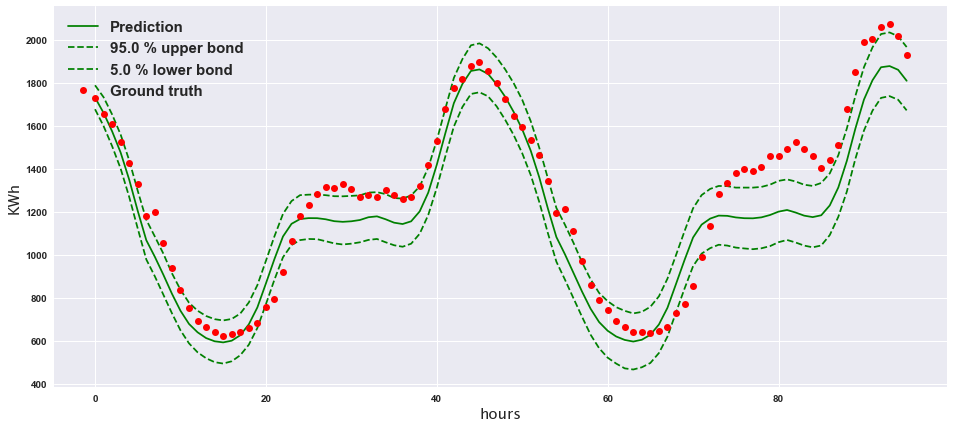

In [22]:
plot_conf_quantile(val_y, ypred, ttest, ypred_t, 185, 0.05)

### Confidence Interval: Static

UnboundLocalError: local variable 'alpha' referenced before assignment

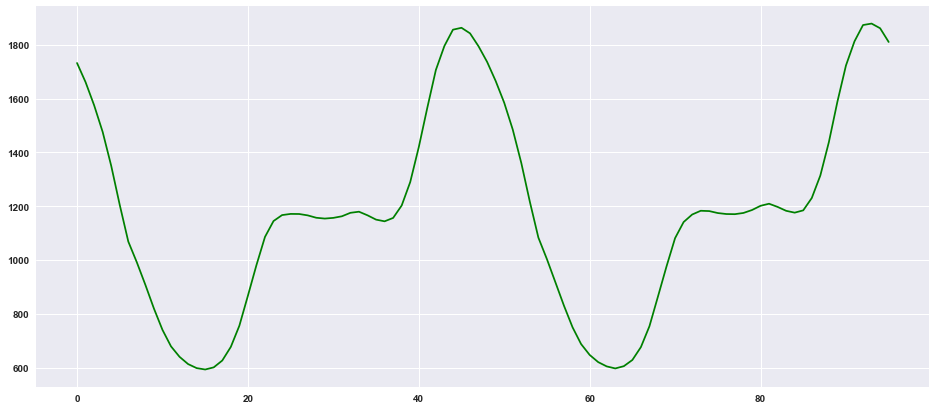

In [23]:
plot_conf_static(val_y, ypred, ttest, ypred_t, 185, 0.)

out_of_bound_pecentage 0.27976190476190477


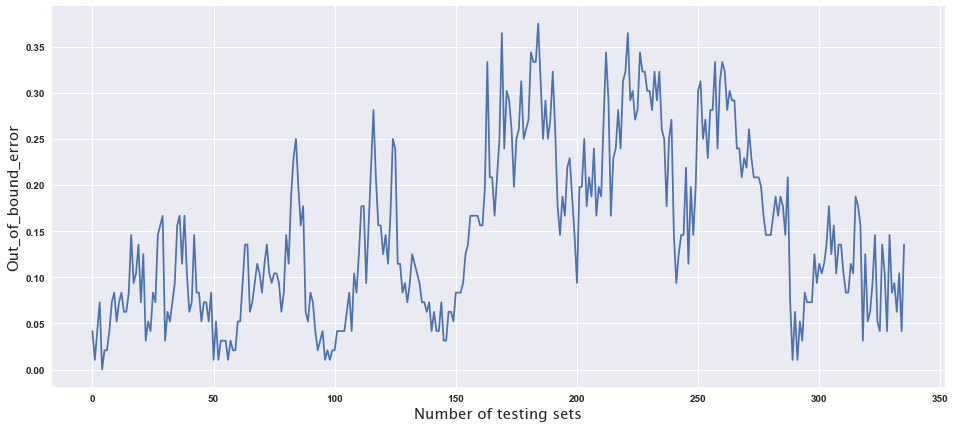

In [189]:
verf_ci_static(1.28, val_y.iloc[:336], ypred[:336], ttest.iloc[:336], ypred_t[:336])

### confidence interval: forest predictors qunatile

NameError: name 'font' is not defined

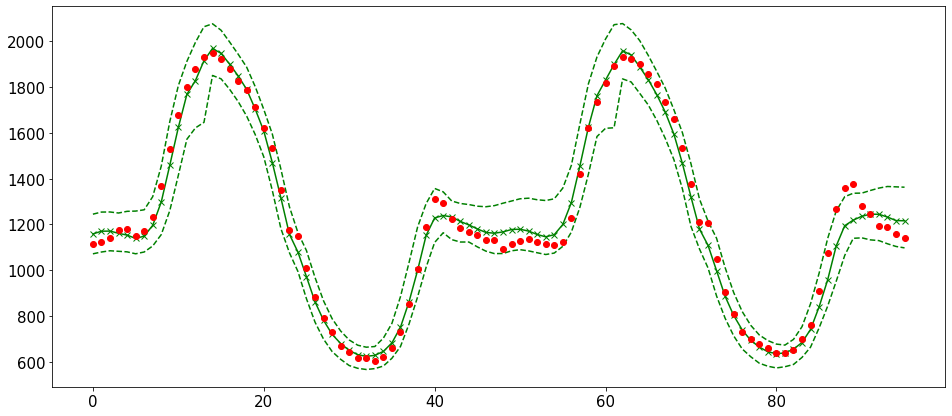

In [18]:
ci_forest(360, 0.1, etr, pftest, ttest)

out_of_bound_pecentage 0.0


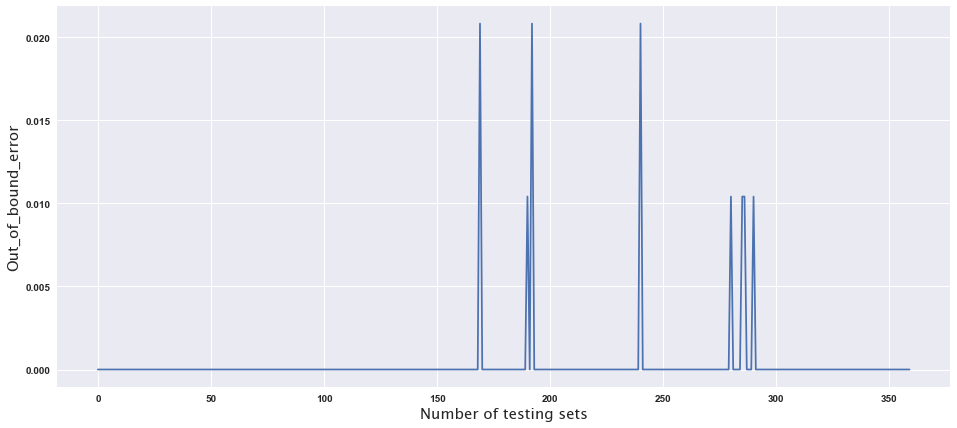

In [195]:
verf_ci_qunatile_forest(0.025, etr, ttest, 360)

### Confidence Interval: dynamic

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
err_knn = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=3,
                    weights='uniform')
#scores = cross_val_score(err_knn, val_X, (val_y - ypred), cv = 5, scoring= 'r2', n_jobs = 4)
#print("cross validation scores:", scores)

In [236]:
from sklearn.ensemble import ExtraTreesRegressor
err_etr = ExtraTreesRegressor()
scores = cross_val_score(err_etr, val_X, (val_y - ypred)**2, cv = 5, scoring= 'r2', n_jobs = 4)
print("cross validation scores:", scores)

cross validation scores: [ 0.14660699 -0.58172587 -3.25540463 -0.24779615 -2.6530114 ]


In [122]:
from sklearn.ensemble import RandomForestRegressor
err_rfr = RandomForestRegressor()
scores = cross_val_score(err_rfr, val_X, (val_y - ypred)**2, cv = 5, scoring= 'r2', n_jobs = 4)
print("cross validation scores:", scores)

cross validation scores: [ 0.23419848  0.33726216  0.14079612 -0.29860155 -0.03461351]


In [90]:
err_knn.fit(val_X, (val_y - ypred)**2)
perrorsq = err_knn.predict(pftest)

In [276]:
err_etr.fit(val_X, (val_y - ypred)**2)
perrorsq = err_etr.predict(pftest)

In [279]:
err_rfr.fit(val_X, (val_y - ypred)**2)
perrorsq = err_rfr.predict(pftest)

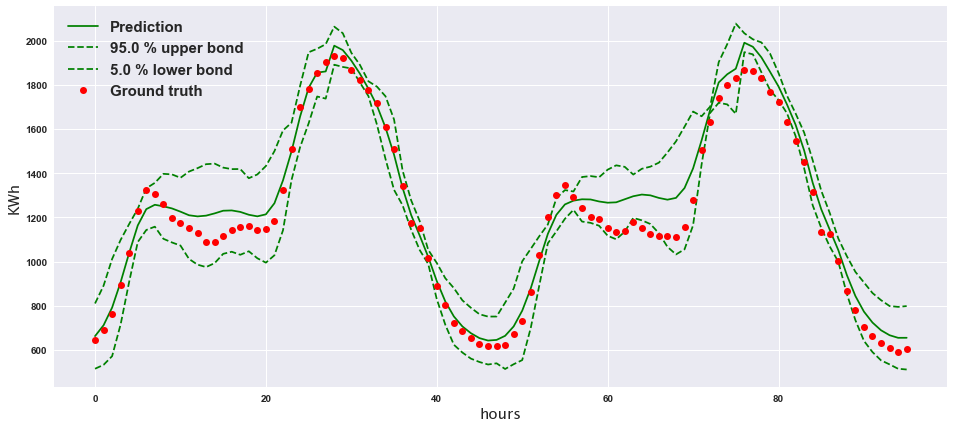

In [338]:
plot_conf_dynamic(perrorsq, ttest, ypred_t, 10, 1.645)

out_of_bound_pecentage 0.15


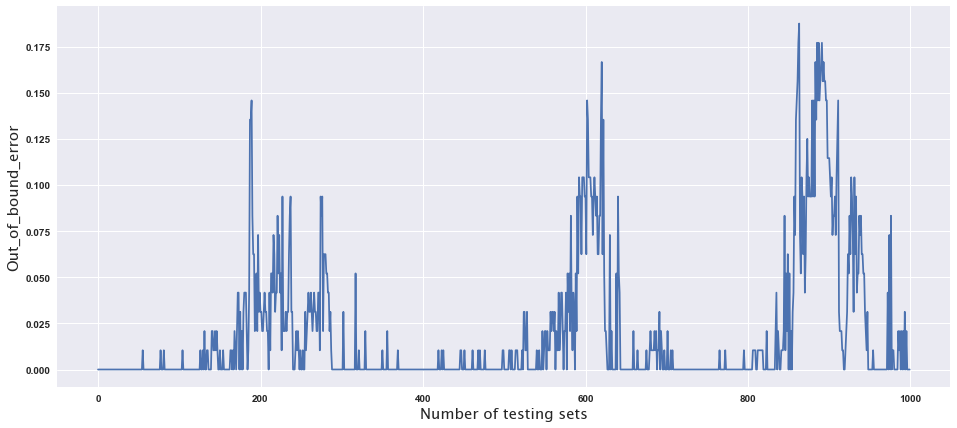

In [93]:
verf_ci_dynamic(1.96, np.sqrt(np.std(perrorsq, axis = 0)), ttest.iloc[:1000,:], ypred_t[:1000,:])

### HistGradientBoostingRegression

In [249]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(loss='least_squares', 
                                    learning_rate=0.1, 
                                    max_iter=100, 
                                    max_leaf_nodes=3, 
                                    max_depth=None, 
                                    min_samples_leaf=20, 
                                    l2_regularization=0.0, 
                                    max_bins=80, 
                                    warm_start=False, 
                                    scoring=None, 
                                    validation_fraction=0.1, 
                                    n_iter_no_change=None, 
                                    tol=1e-07, 
                                    verbose=0, 
                                    random_state=None)
mhgb = RegressorChain(hgb)


In [250]:
from sklearn.model_selection import train_test_split
X = pftrain
y = ttrain
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

%time mhgb.fit(train_X, train_y)

CPU times: user 4min 53s, sys: 17.5 s, total: 5min 11s
Wall time: 52.6 s


RegressorChain(base_estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                            learning_rate=0.1,
                                                            loss='least_squares',
                                                            max_bins=80,
                                                            max_depth=None,
                                                            max_iter=100,
                                                            max_leaf_nodes=3,
                                                            min_samples_leaf=20,
                                                            n_iter_no_change=None,
                                                            random_state=None,
                                                            scoring=None,
                                                            tol=1e-07,
                                                            validat

### Validation set

In [256]:
ypred = mhgb.predict(val_X)

In [257]:
o_y = np.transpose(val_y.iloc[:,:].to_numpy())
p_y = np.transpose(ypred[:,:])
get_eval(o_y, p_y)

MSE: 22206.00745651168
MAE: 93.0692047249096
r2_score: 0.7840358638471235


### Testing set

In [258]:
ypred_t = mhgb.predict(pftest)

In [259]:
o_yt = np.transpose(ttest.iloc[:,:].to_numpy())
p_yt = np.transpose(ypred_t[:,:])
get_eval(o_yt, p_yt)

MSE: 14840.849353798356
MAE: 88.91114028008235
r2_score: 0.9052021181825178


**Create Std: static method**

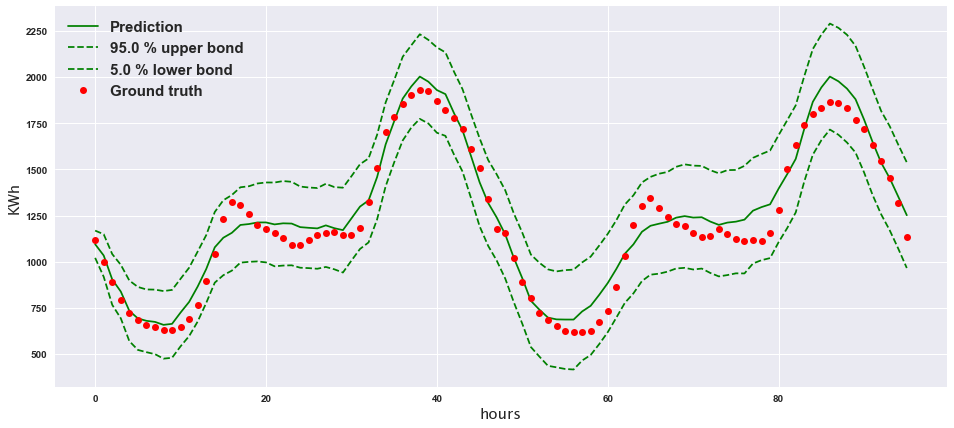

In [260]:
plot_conf_static(val_y, ypred, ttest, ypred_t, 0, 1.645)

out_of_bound_pecentage 0.26414667270258035


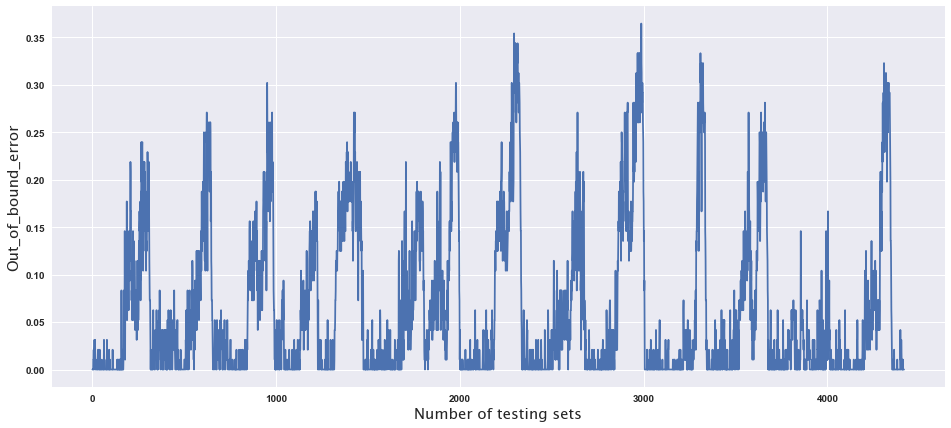

In [262]:
verf_ci_static(1.645, val_y.iloc[:,:], ypred[:,:], ttest.iloc[:,:], ypred_t[:,:])

**Create Std: fit error method**

In [263]:
err_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
err_knn.fit(val_X, (val_y- ypred)**2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

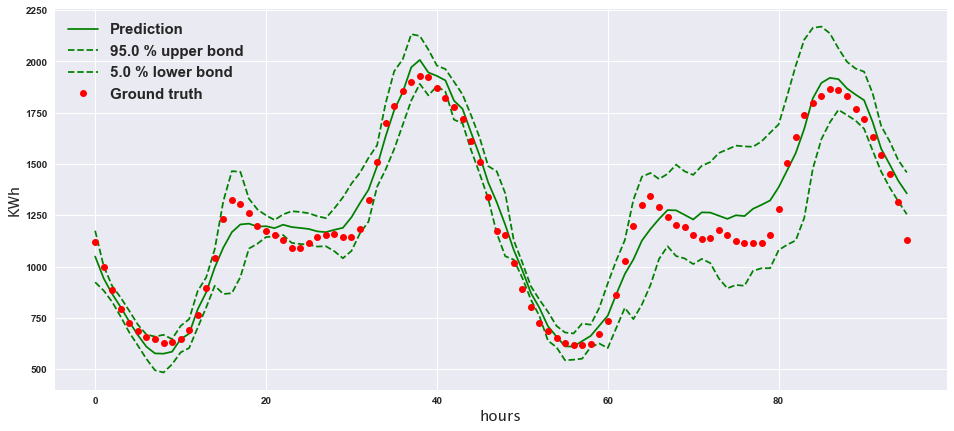

In [478]:
perrorsq = err_knn.predict(pftest)
plot_conf_dynamic(perrorsq, ttest, ypred_t, 0, 1.645)

### Random Forest Regression

In [559]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rfr = RandomForestRegressor(max_depth=15, random_state=1, n_estimators=100)

X = pftrain
y = ttrain
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

%time rfr.fit(train_X, train_y)


CPU times: user 2min 52s, sys: 1.09 s, total: 2min 54s
Wall time: 2min 54s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [560]:
ypred = rfr.predict(val_X)
get_eval(val_y, ypred)

MSE: 9095.299929526684
MAE: 48.630765033709714
r2_score: 0.9667695358962971


In [561]:
ypred_t = rfr.predict(pftest)
get_eval(ttest, ypred_t)

MSE: 10156.267108542155
MAE: 74.08968016832176
r2_score: 0.9361177915083578


### Confidence interval:static

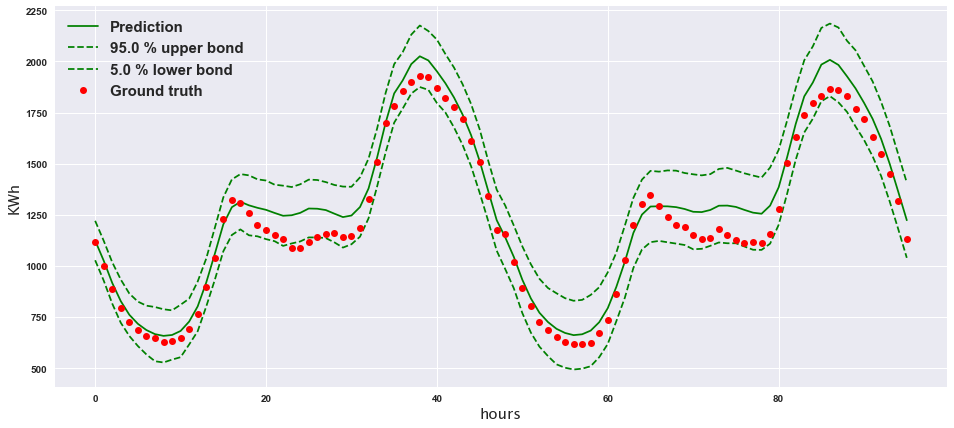

In [562]:
plot_conf_static(val_y, ypred, ttest, ypred_t, 0, 1.645)

### Confidence interval:dynamic

**KNN**

In [563]:
err_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')
err_knn.fit(val_X, (val_y - ypred)**2)
err_knn.score(val_X, (val_y - ypred)**2)

//miniconda3/envs/tpot/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5187379760149411

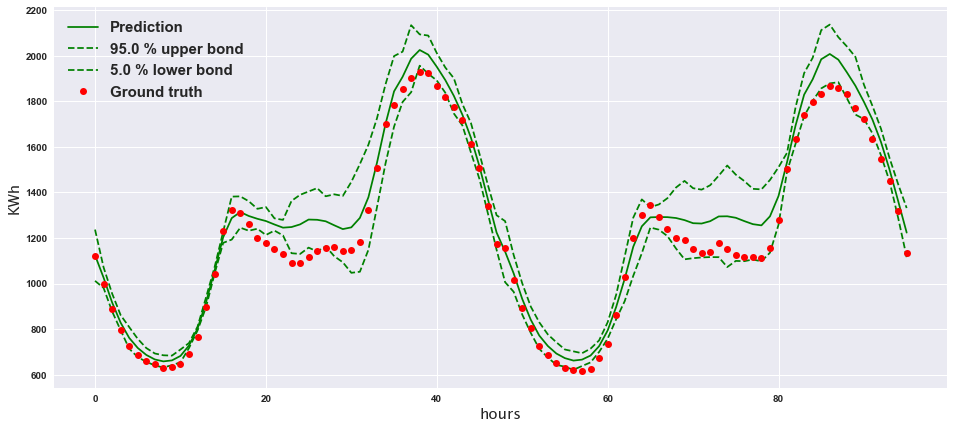

In [564]:
yhat = err_knn.predict(pftest.iloc[0,:].to_numpy().reshape(1,-1))
plot_conf_dynamic(yhat, ttest, ypred_t, 0, 1.645)

**ExtraTrees**


In [565]:
err_etr = ExtraTreesRegressor()
err_etr.fit(val_X, (val_y - ypred)**2)
err_etr.score(val_X, (val_y - ypred)**2)

//miniconda3/envs/tpot/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


1.0

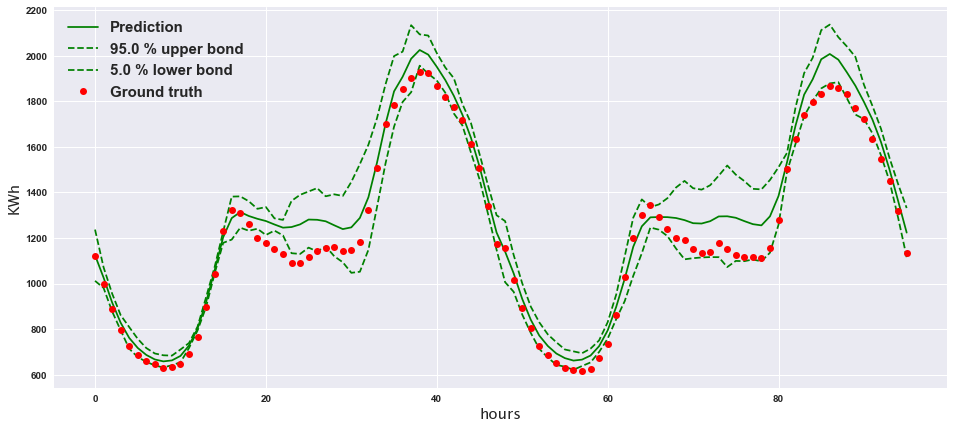

In [567]:
yhat = err_knn.predict(pftest.iloc[0,:].to_numpy().reshape(1,-1))
plot_conf_dynamic(yhat, ttest, ypred_t, 0, 1.645)



### Xgboost: Manual

In [500]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

X = pftrain
y = ttrain
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

xgbr = xgb.XGBRegressor(max_depth=10, njobs= 4)
mr = MultiOutputRegressor(xgbr, n_jobs = 4)
mr.fit(train_X, train_y)
#rc = MultiOutputRegressor(xgbr, cv = 5, random_state = 123)
#rc.fit(train_X, train_y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, njobs=4, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                        

### Result evaluation: validation set

In [513]:
yhat = mr.predict(val_X)

In [502]:
get_eval(val_y, yhat)

MSE: 7765.100654935687
MAE: 44.55453092189882
r2_score: 0.9712537126596072


### Result evaluation: test set

In [503]:
ypred = mr.predict(pftest)

In [504]:
get_eval(ttest, ypred)

MSE: 10175.073762555183
MAE: 70.17073013698152
r2_score: 0.935999498972345


### Confidnece interval: Static

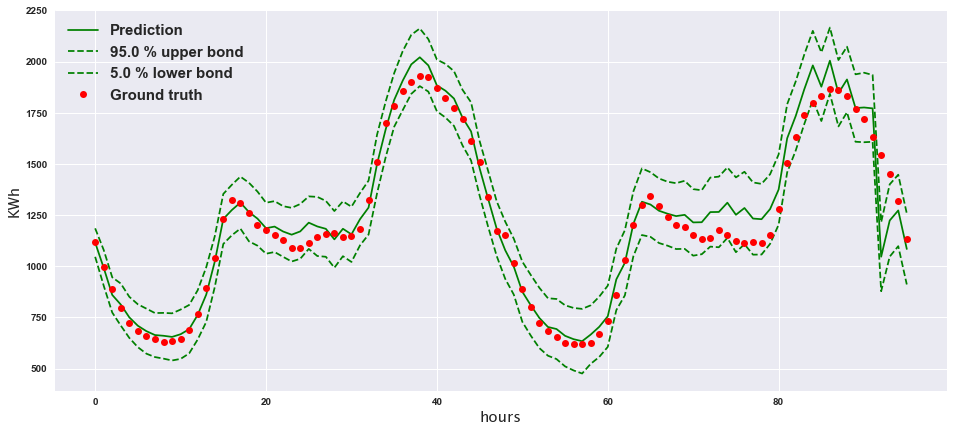

In [508]:
plot_conf_static(val_y, yhat, ttest, ypred, 0, 1.645)

### Confidence Interval: dynamic

In [599]:
from sklearn.model_selection import cross_val_score, cross_val_predict
err_knn = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=3,
                    weights='uniform')
scores = cross_val_score(err_knn, val_X, (val_y - yhat)**2, cv = 10, scoring= 'r2' ,n_jobs = 4)
print("cross validation scores:", scores)

cross validation scores: [0.94346122 0.94695128 0.94615383 0.94496561 0.94323953 0.94689917
 0.92899007 0.9450479  0.94872416 0.94161291]


In [600]:
err_etr = ExtraTreesRegressor()
etr_scores = cross_val_score(err_etr, val_X, (val_y - yhat)**2, cv = 5, scoring= 'r2' ,n_jobs = 4)
print("cv r2_scores:", etr_scores)
predictions = cross_val_predict(err_etr, val_x, (val_y - yhat)**2)

//miniconda3/envs/tpot/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


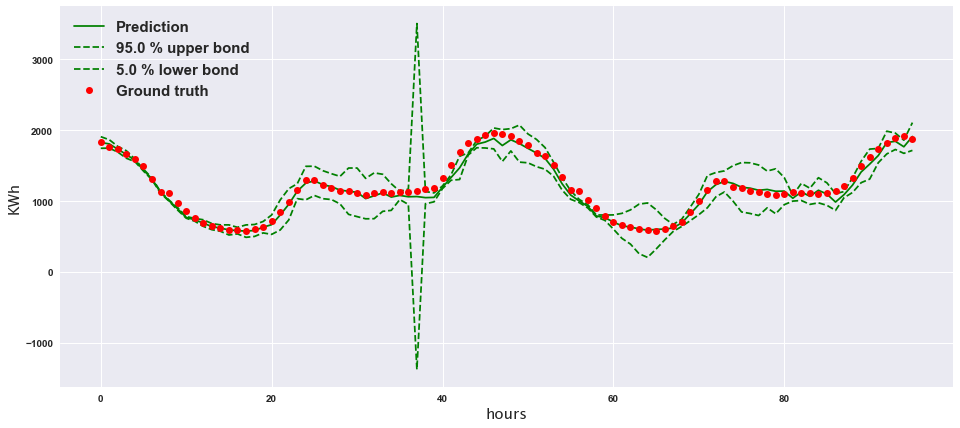

In [544]:
yhat = err_knn.predict(pftest.iloc[0,:].to_numpy().reshape(1,-1))
plot_conf_dynamic(yhat, ttest, ypred, 1000, 1.645)

### LSTM

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             14200     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 96)             4896      
Total params: 19,096
Trainable params: 19,096
Non-trainable params: 0
_________________________________________________________________

Epoch 1/50
 - 3s - loss: 907187.9891
Epoch 2/50
 - 2s - loss: 582957.2942
Epoch 3/50
 - 2s - loss: 340729.4832
Epoch 4/50
 - 2s - loss: 268444.2695
Epoch 5/50
 - 2s - loss: 238410.4348
Epoch 6/50
 - 2s - loss: 212033.8502
Epoch 7/50
 - 2s - loss: 188070.4098
Epoch 8/50
 - 2s - loss: 167425.9583
Epoch 9/50
 - 2s - loss: 150808.0975
Epoch 10/50
 - 2s - loss: 138048.8542
Epoch 11/50
 - 2s - loss: 127697.5308
Epoch 12/50
 - 2s - loss: 118425.3864
Epoch 13/50
 - 2s - loss: 109641.9108
Epoch 14/50
 - 2s - loss: 

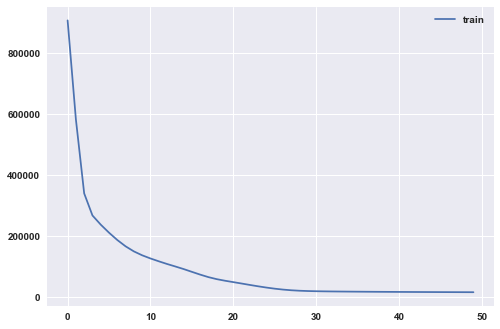

In [418]:
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

train_X, val_X, train_y, val_y = train_test_split(pftrain, ttrain, train_size = 0.7, test_size = 0.3)
ltrain_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
lval_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
ltrain_y = train_y.to_numpy().reshape((train_y.shape[0],1, train_y.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(ltrain_X.shape[1], ltrain_X.shape[2]),return_sequences = True))
model.add(TimeDistributed(Dense(96)))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# fit network
history = model.fit(ltrain_X, ltrain_y, epochs=50, batch_size=72, verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

### Validation sets

**Metrics**


In [419]:
yhat = model.predict(val_X.reshape(val_X.shape[0], 1, val_X.shape[1]))
yhat = yhat.reshape(yhat.shape[0], yhat.shape[2])

In [420]:
get_eval(val_y, yhat)

MSE: 18339.820647197208
MAE: 74.85561810425645
r2_score: 0.9317110281105421


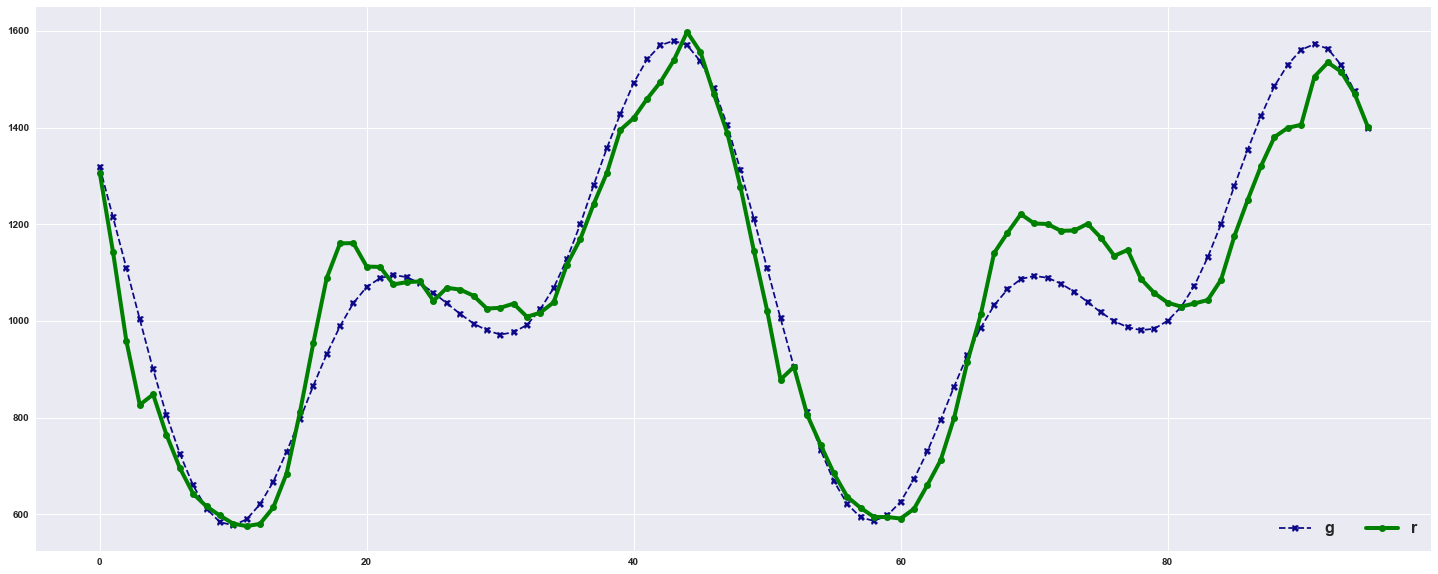

In [421]:
real = val_y.to_numpy()
guess = yhat
real = real[1:2,:96]
guess = guess[1:2,:96]
rpdf = plot_df(real,"r")
gpdf = plot_df(guess,"g")
    
#plot 
ax = plt.gca()
gpdf.plot(figsize=(25,10), colormap = 'plasma',style='--X',legend = True, ax = ax)
rpdf.plot(figsize=(25,10), color = 'g',style ='-o',legend = True, ax = ax,lw = 4)
ax.legend(frameon=False, loc='lower right', ncol=6, prop={'size': 16})
    
plt.show()

### Testing sets

In [425]:
test_x = pftest
yhat = model.predict(test_x.reshape(test_x.shape[0], 1, test_x.shape[1]))
yhat = yhat.reshape(yhat.shape[0], yhat.shape[2])

**Metrics**

In [426]:
test_y = ttest
get_eval(test_y.iloc[:1,:].to_numpy().reshape(-1,1), yhat[:1,:].reshape(-1,1))

MSE: 6897.72371174048
MAE: 63.57475920141602
r2_score: 0.9531105547594014


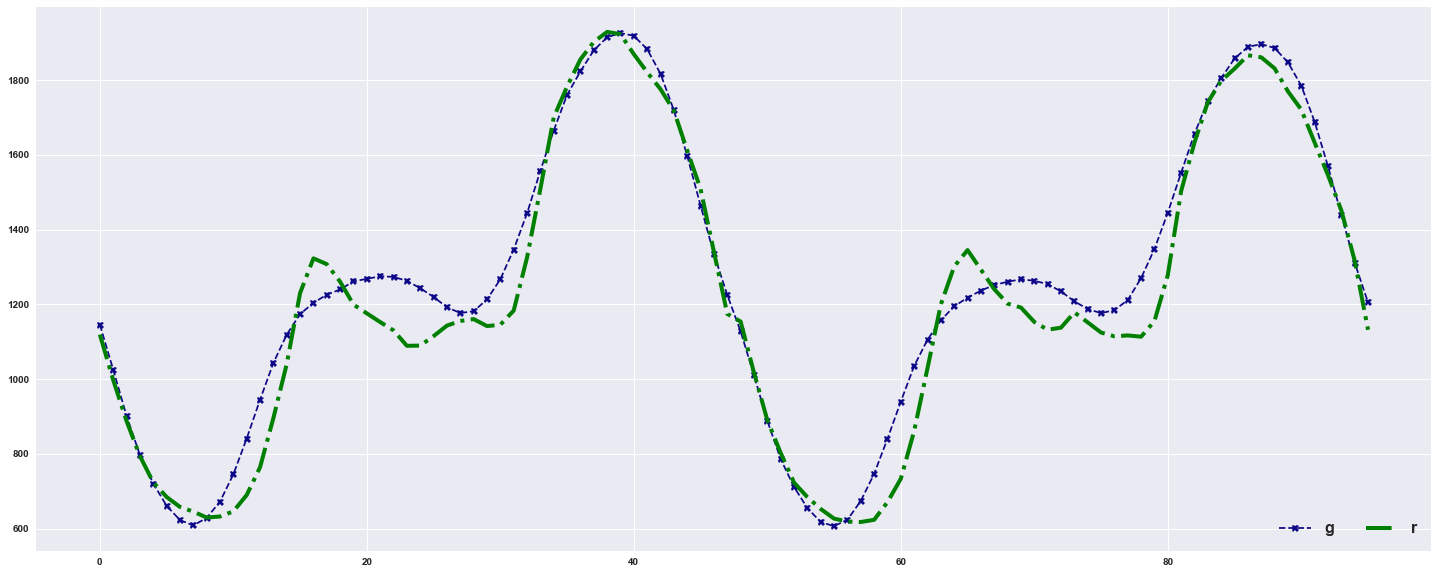

In [427]:
real = test_y.to_numpy()
guess = yhat
real = real[0:1,:96]
guess = guess[0:1,:96]
rpdf = plot_df(real,"r")
gpdf = plot_df(guess,"g")
    
#plot 
ax = plt.gca()
gpdf.plot(figsize=(25,10), colormap = 'plasma',style='--X',legend = True, ax = ax)
rpdf.plot(figsize=(25,10), color = 'g',style ='-.',legend = True, ax = ax,lw = 4)
ax.legend(frameon=False, loc='lower right', ncol=6, prop={'size': 16})
    
plt.show()